<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/241129_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02. 파이토치 기초**

## **02-01 파이토치 패키지의 기본 구성**



### **1. `torch`**

* 메인 네임스페이스

  ❗메인 네임스페이스: 프로그램이 실행되면, 가장 먼저 생성되는 기본적인 네임스페이스이다. 여기에 사용자가 정의한 함수, 변수, 클래스 등이 속하게 된다. Python 같은 언어에서는 스크립트가 실행될 때, `__main__`이라는 네임스페이스가 자동으로 생성된다.
* 텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조를 가진다.

### **2. `torch.autograd`**

자동 미분을 위한 함수들이 포함되어 있다. 자동 미분의 on/off를 제어하는 콘텍스트 매니저나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어 있다.

### **3. `torch.nn`**

신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어 있다. 예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수가 있다.

### **4. `torch.optim`**

확률적 경사 하강법(SGD)을 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있다.

### **5. `torch.utils.data`**

SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있다.

### **6. `torch.onnx`**

ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용한다.
* ONNX: 서로 다른 딥러닝 프레임워크 간 모델을 공유할 때 사용하는 포맷

## **02-02 텐서 조작하기**

### **1. 벡터, 행렬, 텐서**

#### **1) 벡터, 행렬, 텐서**

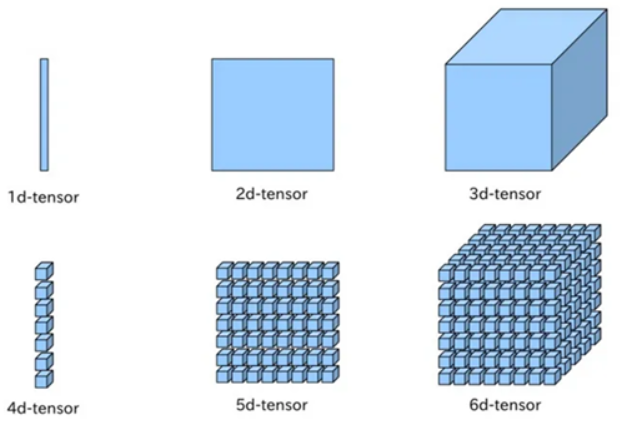

* 스칼라: 차원이 없는 값(숫자 1개)
* 벡터: 1차원으로 구성된 값(1d-tensor, 숫자의 나열)
* 행렬: 2차원으로 구성된 값(2d-tensor)
* 텐서: 3차원

#### **2) PyTorch Tensor Shape Convention**

**2d-tensor**

$|t|=(batch size \times dimension)=(행의 크기 \times 열의 크기)$

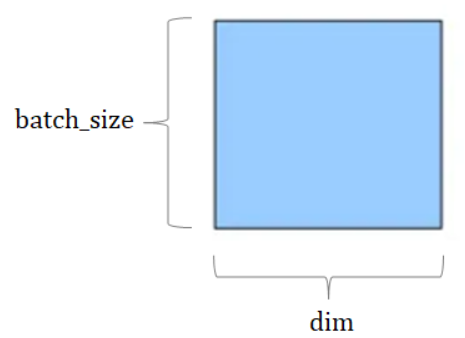

훈련 데이터 하나의 크기가 256이면 벡터 하나에 숫자가 256개 있는 것이다.

훈련 데이터의 개수가 3000개이면 전체 훈련 데이터의 크기는 $3000\times 256$(2d-tensor)이다.

3000개를 1개씩 꺼내서 처리하는 것도 가능하지만 3000개에서 64개씩 꺼내서 처리한다고 가정하면 batch size는 64이다. 컴퓨터가 한 번에 처리하는 2d-tensor의 크기는 $batch size \times dim=64\times 256$이다.

3000을 64로 나누면 46.875이다. 3000개의 데이터를 64개씩 학습하면 총 46번 데이터를 넣어야 모든 데이터를 넣을 수 있다.

**비전 분야의 3d-tensor**

$|t|=(batch size \times width \times height)$

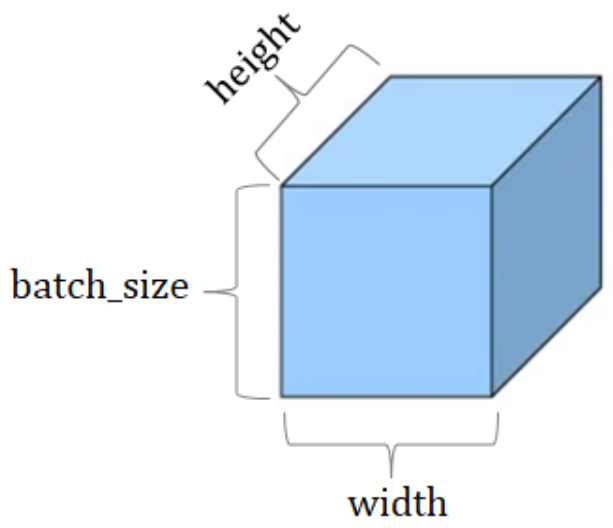

**NLP 분야의 3d-tensor**

$|t|=(batch size \times length \times dim)$

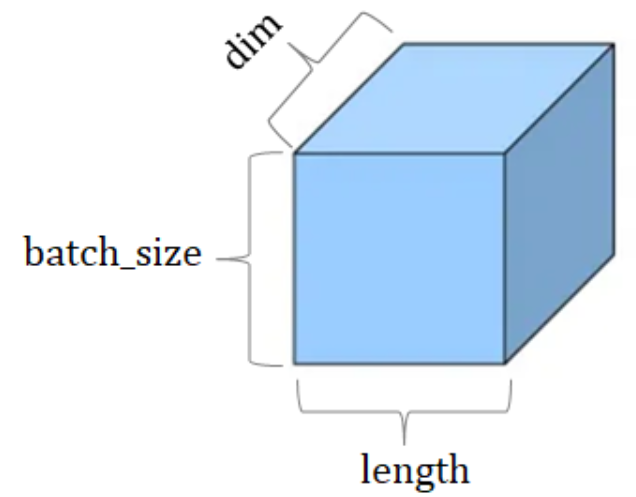

```
[[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]
```

➡️컴퓨터는 '나는 사과를 좋아해'가 단어가 1개인지 3개인지 이해하지 못한다. 컴퓨터의 입력으로 사용하기 위해서는 단어별로 나눠줘야 한다.

```
[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]
```

➡️훈련 데이터의 크기: $4\times3$ 2d-tensor. 컴퓨터는 텍스트보다는 숫자를 더 잘 처리할 수 있기 때문에 각 단어를 벡터로 만든다.

```
'나는' = [0.1, 0.2, 0.9]
'사과를' = [0.3, 0.5, 0.1]
'바나나를' = [0.3, 0.5, 0.2]
'좋아해' = [0.7, 0.6, 0.5]
'싫어해' = [0.5, 0.6, 0.7]
```

위 기준으로 훈련 데이터를 재구성하면 다음과 같다.

```
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]
```

➡️훈련 데이터의 크기: $4\times 3\times 3$(3d-tensor). batch size: 2(임의로 설정)

```
 첫번째 배치 #1
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

두번째 배치 #2
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
 [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]
```

➡️각 배치의 텐서 크기: $2\times 3\times 3=(batch size\times 문장 길이\times 단어 벡터의 차원)$

### **2. 넘파이로 텐서 만들기**

In [19]:
import numpy as np

#### **1) 1D with Numpy**

In [2]:
# list 생성 후 1차원 array로 변환
t=np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [4]:
print('Rank of t:', t.ndim) # 차원
print('Shape of t:', t.shape) # 크기

Rank of t: 1
Shape of t: (7,)


##### **1-1) Numpy 기초 이해하기**

In [5]:
# 인덱스 이용
print('t[0] t[1] t[-1] =', t[0], t[1], t[-1])

t[0] t[1] t[-1] = 0.0 1.0 6.0


In [6]:
# 슬라이싱
print('t[2:5] t[4:1] =', t[2:5], t[4:-1])

t[2:5] t[4:1] = [2. 3. 4.] [4. 5.]


In [7]:
print('t[:2] t[3:] =', t[:2], t[3:])

t[:2] t[3:] = [0. 1.] [3. 4. 5. 6.]


#### **2) 2D with Numpy**

In [8]:
t=np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [9]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 2
Shape of t: (4, 3)


### **3. 파이토치 텐서 선언**

In [2]:
import torch

#### **1) 1D with PyTorch**

In [11]:
t=torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [12]:
print(t.dim()) # rank
print(t.shape) # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [13]:
# 인덱스
print(t[0], t[1], t[-1])
# 슬라이싱
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


#### **2) 2D with PyTorch**

In [14]:
t=torch.FloatTensor([[1., 2., 3.],
                     [4., 5., 6.],
                     [7., 8., 9.],
                     [10., 11., 12.]
                     ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [15]:
print(t.dim()) # rank
print(t.size()) # shape

2
torch.Size([4, 3])


In [16]:
print(t[:, 1])
print(t[:, 1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [17]:
print(t[:, :-1])

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


#### **3) 브로드 캐스팅**

두 행렬 A, B가 있다고 했을 때 행렬의 덧셈과 뺄셈을 할 때에는 두 행렬 A, B의 크기가 같아야 한다. 두 행렬의 곱셈을 할 때에는 A의 마지막 차원과 B의 첫번째 차원이 일치해야 한다.

불가피하게 다른 행렬 또는 텐서에 대해 사칙 연산을 수행할 때 파이토치에서는 자동으로 크기를 맞춰 연산을 수행하는 **브로드 캐스팅**이라는 기능을 제공한다.

In [18]:
# 크기가 같을 때
m1=torch.FloatTensor([[3, 3]])
m2=torch.FloatTensor([[2, 2]])
print(m1+m2)

tensor([[5., 5.]])


In [19]:
# 크기가 다를 때
m1=torch.FloatTensor([[1, 2]])
m2=torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1+m2)

tensor([[4., 5.]])


In [20]:
m1=torch.FloatTensor([[1, 2]])
m2=torch.FloatTensor([[3], [4]])
print(m1+m2)

tensor([[4., 5.],
        [5., 6.]])


#### **4) 자주 사용되는 기능**

##### **1) 행렬 곱셈과 곱셈의 차이**

* 행렬 곱셈: `matmul()`
* 원소별 곱셈: '*' or `mul()`

In [3]:
# 행렬 곱셈
m1=torch.FloatTensor([[1, 2], [3, 4]])
m2=torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1:', m1.shape)
print('Shape of Matrix 2:', m2.shape)
print(m1.matmul(m2))

Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [4]:
# 원소별 곱셈
m1=torch.FloatTensor([[1, 2], [3, 4]])
m2=torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1:', m1.shape)
print('Shape of Matrix 2:', m2.shape)
print(m1*m2)
print(m1.mul(m2))

Shape of Matrix 1: torch.Size([2, 2])
Shape of Matrix 2: torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


##### **2) 평균**

In [5]:
t=torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [6]:
t=torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [7]:
print(t.mean())

tensor(2.5000)


In [8]:
print(t.mean(dim=0)) # 열별 평균

tensor([2., 3.])


In [9]:
print(t.mean(dim=1)) # 행별 평균

tensor([1.5000, 3.5000])


In [10]:
print(t.mean(dim=-1)) # 열별 평균

tensor([1.5000, 3.5000])


##### **3) 덧셈**

In [11]:
t=torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [12]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


##### **4) `max, argmax`**

* `max`: 최댓값
* `argmax`: 최댓값을 가진 인덱스

In [13]:
t=torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [14]:
print(t.max())

tensor(4.)


In [15]:
print(t.max(dim=0)) # 열별 max, argmax 모두 출력

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [16]:
print('Max:', t.max(dim=0)[0])
print('Argmax:', t.max(dim=0)[1])

Max: tensor([3., 4.])
Argmax: tensor([1, 1])


In [17]:
print(t.max(dim=1)) # 행별 max,  argmax 모두 출력
print(t.max(dim=-1)) # 행별 max,  argmax 모두 출력

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


##### **5) 뷰**

* reshape와 같은 역할을 한다. 즉, 텐서의 크기를 변경해주는 역할을 한다.
* 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 한다.

In [20]:
t=np.array([[[0, 1, 2],
             [3, 4, 5]],
            [[6, 7, 8],
             [9, 10, 11]]])
ft=torch.FloatTensor(t)

In [21]:
print(ft.shape)

torch.Size([2, 2, 3])


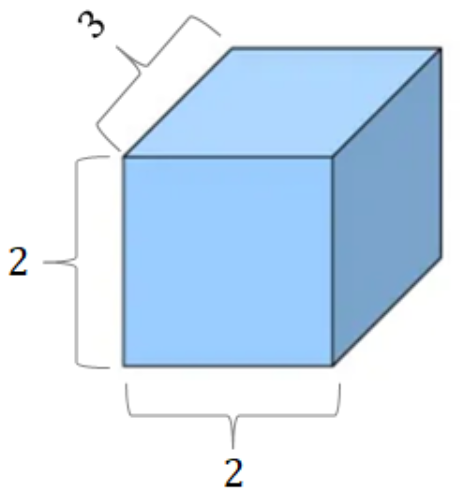

**5-1) 3차원 텐서에서 2차원 텐서로 변경**

In [23]:
print(ft.view([-1, 3])) # (?, 3) 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


**5-2) 3차원 텐서의 크기 변경**

In [24]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


##### **6) 스퀴즈**

차원이 1인 경우 해당 차원을 제거한다.

예) $(3\times1)$➡️$(3,)$

In [25]:
ft=torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [26]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


##### **7) 언스퀴즈**

특정 위치에 1인 차원을 추가할 수 있다.

예) $(3,)$➡️$(1\times 3)$

In [27]:
ft=torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [28]:
print(ft.unsqueeze(0)) # 첫 번째 차원(index 0)에 1인 차원이 추가된다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [29]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [30]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [31]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


##### **8) 타입 캐스팅**

텐서의 자료형은 데이터형별로 정의되어 있다.
* 32비트의 부동 소수점: `torch.FloatTensor`
* 64비트의 부호 있는 정수: `torch.LongTensor`
* GPU 연산을 위한 자료형: `torch.cuda.FloatTensor`

이러한 자료형을 변환하는 것이 **타입 캐스팅**이다.

In [32]:
lt=torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [33]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [34]:
bt=torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [36]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


##### **9) 연결하기**

In [37]:
x=torch.FloatTensor([[1, 2], [3, 4]])
y=torch.FloatTensor([[5, 6], [7, 8]])

In [38]:
print(torch.cat([x, y], dim=0)) # 첫 번째 차원을 늘려라

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [39]:
print(torch.cat([x, y], dim=1)) ## 두 번째 차원을 늘려라

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


##### **10) 스택킹**

In [40]:
x=torch.FloatTensor([1, 4])
y=torch.FloatTensor([2, 5])
z=torch.FloatTensor([3, 6])

In [41]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [42]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [43]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


##### **11) `ones_like`, `zeros_like`**

In [45]:
x=torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [46]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [47]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


##### **12) In-place Operation**

In [48]:
x=torch.FloatTensor([[1, 2], [3, 4]])

In [49]:
print(x.mul(2.)) # 곱하기 2
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


## **02-03 파이썬 클래스**

### **1. 함수와 클래스의 차이**

#### **1. 함수로 덧셈기 구현**

In [50]:
result=0

In [51]:
def add(num):
  global result
  result+=num
  return result

In [52]:
print(add(3))
print(add(4))

3
7


#### **2. 함수로 두 개의 덧셈기 구현**

In [54]:
result1=0
result2=0

def add1(num):
  global result1
  result1+=num
  return result1

def add2(num):
  global result2
  result2+=num
  return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


#### **3. 클래스로 덧셈기 구현**

In [55]:
class Calculator:
  # 객체 생성 시 호출될 때 실행되는 초기화 함수(생성자)
  def __init__(self):
    self.result=0

  # 객체 생성 후 사용할 수 있는 함수
  def add(self, num):
    self.result+=num
    return self.result

In [56]:
cal1=Calculator()

In [57]:
cal2=Calculator()

In [58]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


# **03. 머신러닝 입문**

## **03-01 선형 회귀와 자동 미분**

### **1. 데이터에 대한 이해**

#### **1) 훈련 데이터셋과 테스트 데이터셋**

#### **2) 훈련 데이터셋의 구성**

* `x_train`: 공부한 시간
* `y_train`: 매핑되는 점수

In [59]:
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

### **2. 가설 수립**

보통 머신러닝에서 가설은 임의로 추측해서 세워보는 식일 수도 있고, 경험적으로 알고 있는 식일 수도 있다. 맞는 가설이 아니라고 판단되면 계속 수정해나가기도 한다.

* 선형 회귀: 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 것이다.
$$y=Wx+b$$
$$H(x)=Wx+b$$
  * W: 기울기
  * b: y절편

### **3. 비용 함수에 대한 이해**

비용함수=손실함수=오차함수=목적함수

🔽평균 제곱 오차를 W와 b에 의한 비용 함수로 재정의하면 다음과 같다.

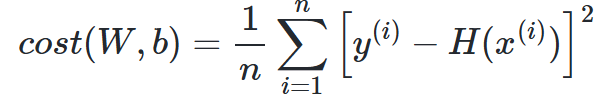

$Cost(W, b)$를 최소로 만드는 W와 b를 구하면 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있다.

### **4. 옵티마이저 - 경사 하강법**

옵티마이저 알고리즘(최적화 알고리즘): $Cost(W, b)$를 최소로 만드는 W와 b를 구하는 방법

이 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 머신 러닝에서 **학습**이라고 부른다.

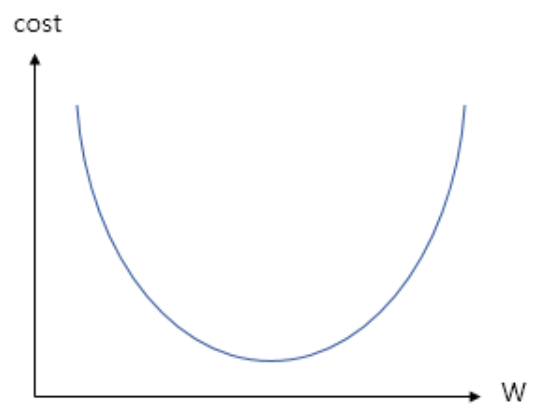

기울기 W가 무한대로 커지면 커질수록 cost의 값 또한 무한대로 커지고 반대로 기울기 W가 무한대로 작아져도 cost의 값은 무한대로 커진다.

기계는 임의의 초기값 W를 정한 뒤 볼록한 부분을 향해 점차 W의 값을 수정한다. 이 방법 중 하나가 경사 하강법이다.

cost가 최소가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 미분값이 0이 되는 지점이다. 즉, 비용함수를 미분하여 현재 W에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복한다.

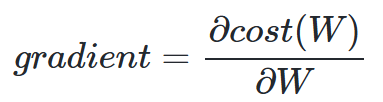

* 기울기가 음수일 때 W 값 증가

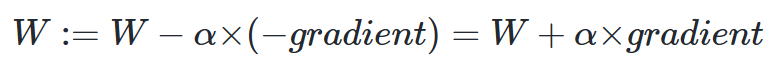

* 기울기가 양수일 때 W 값 감소

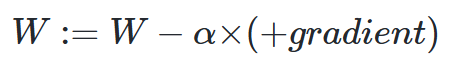

두 경우 모두 접선의 기울기가 0인 방향으로 W의 값을 조정한다.

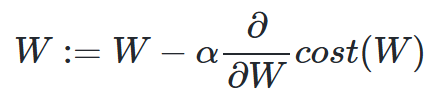

* α: 학습률(learning rate). W의 값을 변경할 때 얼마나 크게 변경할지 결정한다. 또는 W를 그래프의 한 점으로 보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서 얼마나 큰 폭으로 이동할지 결정한다.

학습률이 지나치게 높은 값을 가질 때는 cost 값이 발산한다. 학습률이 지나치게 낮은 값을 가지면 학습 속도가 느려진다.

### **5. 파이토치로 선형 회귀 구현**

#### **1) 기본 세팅**

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [61]:
torch.manual_seed(1)

#### **2) 변수 선언**

In [62]:
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

In [63]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [64]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


#### **3) 가중치와 편향의 초기화**

In [65]:
# 가중치 초기화
W=torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [66]:
b=torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


#### **4) 가설 세우기**

In [67]:
hypothesis=x_train*W+b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


#### **5) 비용 함수 선언**

In [68]:
cost=torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


#### **6) 경사 하강법 구현**

* `SGD`: 경사 하강법의 일종
* `lr`: 학습률

In [69]:
optimizer=optim.SGD([W, b], lr=0.01)

In [ ]:
# gradient 0으로 초기화
optimizer.zero_grad()
# 비용함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

#### **7) 전체 코드**

In [74]:
# 데이터
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer=optim.SGD([W, b], lr=0.01)

nb_epochs=2000 # 경사하강법 반복 횟수
for epoch in range(nb_epochs+1):
  # H(x) 계산
  hypothesis=x_train*W+b

  # cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch%100==0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), b.item(), cost.item()
    ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost: 0.000008

📍최종 훈련 결과

* 최적 기울기 W: 2
* b: 0

📍실제 정답
* W: 2
* b: 0

➡️$H(x)=2x$

### **6. `optimizer.zero_grad()`가 필요한 이유**

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시킨다는 특징이 있다. 따라서 미분값을 0으로 계속 초기화시켜줘야 한다.

In [75]:
import torch
w=torch.tensor(2.0, requires_grad=True)

nb_epochs=20
for epoch in range(nb_epochs+1):
  z=2*w
  z.backward()
  print('수식을 w로 미분한 값: {}'.format(w.grad))

수식을 w로 미분한 값: 2.0
수식을 w로 미분한 값: 4.0
수식을 w로 미분한 값: 6.0
수식을 w로 미분한 값: 8.0
수식을 w로 미분한 값: 10.0
수식을 w로 미분한 값: 12.0
수식을 w로 미분한 값: 14.0
수식을 w로 미분한 값: 16.0
수식을 w로 미분한 값: 18.0
수식을 w로 미분한 값: 20.0
수식을 w로 미분한 값: 22.0
수식을 w로 미분한 값: 24.0
수식을 w로 미분한 값: 26.0
수식을 w로 미분한 값: 28.0
수식을 w로 미분한 값: 30.0
수식을 w로 미분한 값: 32.0
수식을 w로 미분한 값: 34.0
수식을 w로 미분한 값: 36.0
수식을 w로 미분한 값: 38.0
수식을 w로 미분한 값: 40.0
수식을 w로 미분한 값: 42.0


### **7. `torch.manual_seed()`를 하는 이유**

In [76]:
import torch

In [77]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1, 3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [78]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1, 3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [79]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1, 3):
  print(torch.rand(1))

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


텐서의 `require_grad`라는 속성을 True로 설정하면 자동 미분 기능이 적용된다. 이 텐서에 연산을 하면 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산된다.

### **8. 자동 미분 실습**

임의로 $2w^2+5$라는 식을 세우고 w에 대해 미분해보자.

In [80]:
import torch

값이 2인 임의의 스칼라 텐서 w를 선언한다. 이때 required_grad를 True로 설정한다. 이는 이 텐서에 대한 기울기를 저장하겠다는 의미이다. w.grad에 w에 대한 미분값이 저장된다.

In [81]:
w=torch.tensor(2.0, requires_grad=True)

In [82]:
y=w**2
z=2*y+5

In [83]:
# w에 대한 기울기 계산
z.backward()

In [84]:
print('수식을 w로 미분한 값: {}'.format(w.grad))

수식을 w로 미분한 값: 8.0


## **03-02 다중 선형 회귀**

x가 1개인 선형 회귀를 단순 선형 회귀라고 한다. 다수의 x로부터 y를 예측하는 다중 선형 회귀에 대해 이해해보자.

### **1. 데이터에 대한 이해**

독립변수가 3개일 때
$$H(x)=w_1x_1+w_2x_2+w_3x_3+b$$

### **2. 파이토치로 구현**

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [86]:
torch.manual_seed(1)

In [90]:
# 훈련 데이터
x1_train=torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train=torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train=torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

In [91]:
# 가중치 w와 편향 b 초기화
w1=torch.zeros(1, requires_grad=True)
w2=torch.zeros(1, requires_grad=True)
w3=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)

In [92]:
# optimizer 설정
optimizer=optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs=1000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  hypothesis=x1_train*w1+x2_train*w2+x3_train*w3+b

  # cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 계산
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch%100==0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
    ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


x의 개수가 많으면 모두 선언해야 하기 때문에 비효율적이다. 따라서 **행렬 곱셈 연산**을 사용한다.

#### **1) 벡터 연산으로 이해하기**

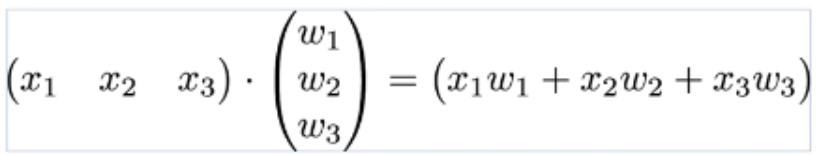

$$H(X)=XW$$

x의 개수가 3개임에도 X와 W라는 두 개의 변수로 표현할 수 있다.

#### **2) 행렬 연산으로 이해하기**

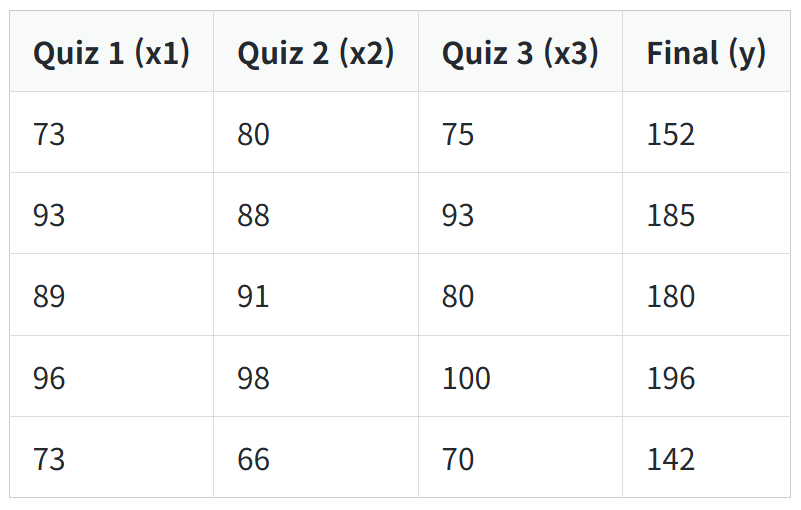

전체 훈련 데이터의 개수를 셀 수 있는 1개의 단위를 샘플이라고 한다. 현재 샘플의 수는 총 5개이다.

각 샘플에서 y를 결정하게 하는 각각의 독립 변수 x를 특성이라고 한다. 현재 특성은 3개이다.

➡️ 독립변수 x의 수가 $(샘플의 수\times 특성의 수)=15$

독립 변수 x를 하나의 행렬 X로 표현할 수 있다.

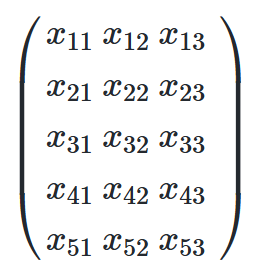

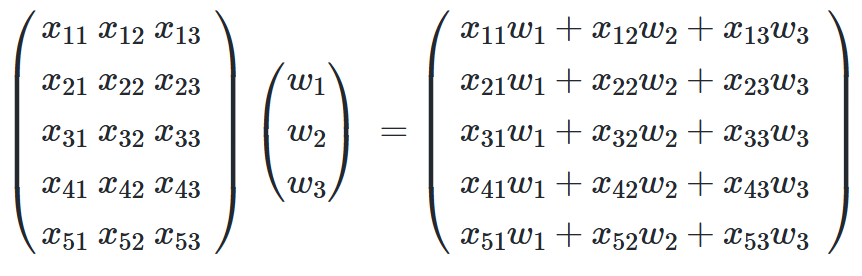

여기에 편향 벡터 B를 추가한다.

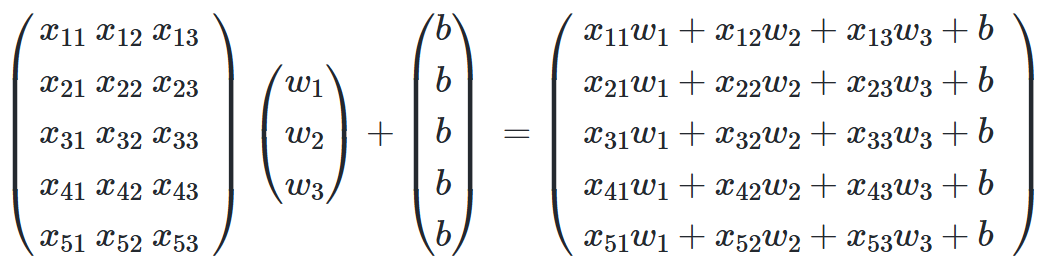

📍$H(X)=XW+B$

### **4. 행렬 연산을 고려하여 파이토치로 구현**

In [93]:
x_train=torch.FloatTensor([[73, 80, 75],
                           [90, 88, 93],
                           [89, 91, 80],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

이전에 `x_train`을 3개 구현했던 것과는 다르게 이번에는 `x_train` 하나에 모든 샘플을 전부 선언하였다. 즉, $(5\times3)$ 행렬 X를 선언한 것이다.

In [94]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [95]:
# 가중치와 편향 선언
W=torch.zeros((3, 1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

행렬곱 연산을 생각하고 (3, 1) 설정

In [96]:
hypothesis=x_train.matmul(W)+b

In [97]:
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 80],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W=torch.zeros((3, 1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer=optim.SGD([W, b], lr=1e-5)

nb_epochs=20
for epoch in range(nb_epochs+1):
  # H(x) 계산
  hypothesis=x_train.matmul(W)+b

  # cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

In [98]:
# 임의의 입력 값에 대한 예측
with torch.no_grad():
  new_input=torch.FloatTensor([[75, 85, 72]])
  prediction=new_input.matmul(W)+b
  print('Predicted value for input {}: {}'.format(new_input.squeeze().tolist(), prediction.item()))

Predicted value for input [75.0, 85.0, 72.0]: 156.8051300048828


* `with torch.no_grad()`: 이 블록 안에서 수행되는 모든 연산에 대해 역전파(즉, 기울기 계산)를 비활성화한다. 예측할 때는 가중치를 업데이트할 필요가 없기 때문에 메모리와 계산 지원을 절약하기 위해 `torch.no_grad()`를 사용하는 것이 좋다.
* `new_input=torch.FloatTensor([[75, 85, 72]])`: 예측하고자하는 새로운 입력 값을 정의한다. `new_input`은 FloatTensor 형식의 2차원 텐서로, 이 경우 [[75, 85, 72]]라는 값을 가지는 텐서를 생성한다. 이 값들은 모델이 학습한 기존 데이터와 동일한 차원을 가지며, 각 숫자는 특정 특징을 나타낸다.
* `prediction=new_input.matmul(W)+b`: 모델이 예측을 수행한다.
* `new_input.squeeze().tolist()`: 입력 값을 리스트 형태로 변환하여 보기 쉽게 만든다.
* `prediction.item()`: 텐서로 반환된 예측 값을 파이썬의 숫자 자료형으로 변환해 출력한다. 출력문에서는 입력된 값과 그에 대한 모델의 예측 값을 함께 보여준다.

## **03-03 `nn.Module`과 클래스로 구현**

이전까지는 가설, 비용함수를 직접 정의해서 모델을 구현했다. 이번에는 파이토치에서 이미 구현되어 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현한다.

```
import torch.nn as nn
model=nn.Linear(input_dim, output_dim)
```
```
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)
```

### **1. 단순 선형 회귀 구현**

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [101]:
torch.manual_seed(1)

In [102]:
# 데이터
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

In [103]:
# 모델을 선언 및 초기화, 단순 선형 회귀이므로 input_dim=1, output_dim=1
model=nn.Linear(1, 1)

➡️ (1, 1): 하나의 입력 x에 대해서 하나의 출력을 가진다.

In [104]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


* 첫 번째 값: W
* 두 번째 값: b

현재는 랜덤 초기화되어 있다. 두 값 모두 학습의 대상이므로 requires_grad=True가 되어 있다.

In [105]:
# optimizer 설정. 경사 하강법 SGD 사용
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

In [106]:
nb_epochs=2000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  prediction=model(x_train)

  # cost 계산
  cost=F.mse_loss(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()

  # 비용함수를 미분하여 gradient 계산
  cost.backward()

  # W, b 업데이트
  optimizer.step()

  if epoch%100==0:
    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [107]:
# 임의의 입력 4 선언
new_var=torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y=model(new_var)

print('훈련 후 입력이 4일 때의 예측값:', pred_y)

훈련 후 입력이 4일 때의 예측값: tensor([[7.9989]], grad_fn=<AddmmBackward0>)


➡️8과 매우 가까우므로 W와 b의 값이 어느정도 최적화되었다.

In [108]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


* H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 한다.
* 학습 전 prediction=model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산이다.
* 학습 후 pred_y=model(new_var)은 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산이다.
* 학습 과정에서 비용함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다.
* cost.backward()는 비용함수로부터 기울기를 구하라는 의미이며 backward 연산이다.

### **2. 다중 선형 회귀 구현**

In [109]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [110]:
torch.manual_seed(1)

In [111]:
# 데이터
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

In [112]:
model=nn.Linear(3, 1)

* (3, 1): 3개의 입력 x에 대해 하나의 출력 y를 가진다.

In [113]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [114]:
optimizer=torch.optim.SGD(model.parameters(), lr=1e-5)

In [115]:
nb_epochs=2000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  prediction=model(x_train)

  # cost 계산
  cost=F.mse_loss(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [116]:
# 임의의 입력 [73, 80, 75]
new_var=torch.FloatTensor([[73, 80, 75]])
pred_y=model(new_var)
print('훈련 후 입력이 73, 80, 75일 때의 예측값:', pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값: tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [117]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


### **3. 모델을 클래스로 구현하기**

In [118]:
model=nn.Linear(1, 1)

In [119]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

In [120]:
model=LinearRegressionModel()

* 클래스 형태의 모델은 `nn.Module`을 상속받는다.
* `__init__()`: 모델의 구조와 동작을 정의하는 생성자 정의. 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.
* `super()`: 여기서 만든 클래스는 `nn.Module` 클래스의 속성들을 가지고 초기화된다.
* `forward()`: 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수. model 객체를 데이터와 함께 호출하면 자동으로 실행된다. 예를 들어 model이란 이름의 객체를 생성한 후, model과 같은 형식으로 객체를 호출하면 자동으로 연산이 수행된다.

In [121]:
model=nn.Linear(3, 1)

In [122]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

In [123]:
model=MultivariateLinearRegressionModel()

### **4. 단순 선형 회귀 클래스로 구현**

In [124]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [125]:
torch.manual_seed(1)

In [126]:
# 데이터
x_train=torch.FloatTensor([[1], [2], [3]])
y_train=torch.FloatTensor([[2], [4], [6]])

In [127]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)

In [128]:
model=LinearRegressionModel()

In [129]:
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

In [130]:
nb_epochs=2000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  prediction=model(x_train)

  # cost 계산
  cost=F.mse_loss(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


### **5. 다중 선형 회귀 클래스로 구현**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [132]:
torch.manual_seed(1)

In [133]:
# 데이터
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

In [134]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(3, 1)

  def forward(self, x):
    return self.linear(x)

model=MultivariateLinearRegressionModel()

In [135]:
optimizer=torch.optim.SGD(model.parameters(), lr=1e-5)

In [137]:
nb_epochs=2000
for epoch in range(nb_epochs+1):
  # H(x) 계산
  prediction=model(x_train)

  # cost 계산
  cost=F.mse_loss(prediction, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 9926.265625
Epoch  100/2000 Cost: 0.225971
Epoch  200/2000 Cost: 0.223895
Epoch  300/2000 Cost: 0.221921
Epoch  400/2000 Cost: 0.220036
Epoch  500/2000 Cost: 0.218253
Epoch  600/2000 Cost: 0.216555
Epoch  700/2000 Cost: 0.214939
Epoch  800/2000 Cost: 0.213403
Epoch  900/2000 Cost: 0.211942
Epoch 1000/2000 Cost: 0.210548
Epoch 1100/2000 Cost: 0.209220
Epoch 1200/2000 Cost: 0.207956
Epoch 1300/2000 Cost: 0.206755
Epoch 1400/2000 Cost: 0.205603
Epoch 1500/2000 Cost: 0.204509
Epoch 1600/2000 Cost: 0.203470
Epoch 1700/2000 Cost: 0.202474
Epoch 1800/2000 Cost: 0.201530
Epoch 1900/2000 Cost: 0.200628
Epoch 2000/2000 Cost: 0.199762


## **03-04 미니 배치와 데이터 로더**

### **1. 미니 배치, 배치 크기**

In [3]:
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

➡️샘플의 개수: 5개

전체 데이터를 하나의 행렬로 선언하염 전체 데이터에 대해 경사하강법을 수행하여 학습할 수 있다. 하지만 현업에서 다루게 되는 데이터의 양은 방대하다. 만약 데이터가 수십만개 이상이라면 전체 데이터에 대해 경사하강법을 수행하는 것은 속도가 느릴 뿐만 아니라 많은 계산량이 필요하다. 메모리의 한계로 계산이 불가한 경우도 있다.

➡️전체 데이터를 더 작은 단위로 나누어 단위별로 학습하는 개념이 도입되었다. (미니 배치)

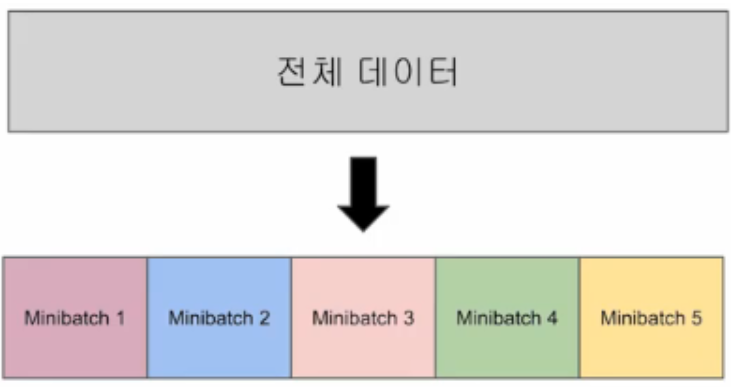

미니 배치만큼만 가져가서 미니 배치에 대한 비용을 계산하고 경사하강법을 수행한다. 처음부터 마지막 미니 배치까지 이를 반복한다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1에포크가 끝난다.

미니 배치의 개수는 미니 배치의 크기를 몇으로 하느냐에 따라 달라진다. (배치 크기)

전체 데이터에 대해 한 번에 경사하강법을 수행하는 방법을 배치 경사하강법이라고 한다. 반면 미니 배치 단위로 경사하강법을 수행하는 방법을 미니 배치 경사하강법이라고 한다.

* 배치 경사하강법은 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만 계산량이 너무 많이 든다.
* 미니 배치 경사하강법은 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다.
* 배치 크기는 보통 2의 제곱수를 사용한다. 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치 크기가 2의 제곱수일 경우 데이터 송수신의 효율을 높일 수 있기 때문이다.

### **2. 이터레이션**

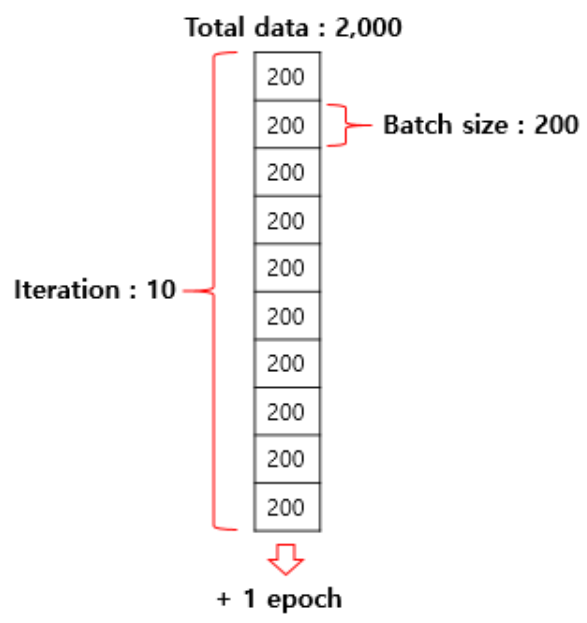

이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수이다. 전체 데이터가 2000일 때 배치 크기를 200으로 하면 이터레이션의 수는 총 10개이다. 이는 한 번의 에포크당 매개변수 업데이트가 10번 이루어짐을 의미한다.

### **3. 데이터 로드**

데이터셋, 데이터로더: 미니 배치 학습, 데이터 셔플, 병렬 처리를 간단히 수행할 수 있다.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [6]:
x_train=torch.FloatTensor([[73, 80, 75],
                           [93, 88, 93],
                           [89, 91, 90],
                           [96, 98, 100],
                           [73, 66, 70]])
y_train=torch.FloatTensor([[152], [185], [180], [196], [142]])

In [8]:
dataset=TensorDataset(x_train, y_train)

데이터로더의 인자 2개: 데이터셋, 미니 배치 크기
* `shuffle=True`: epoch마다 데이터셋을 섞어 데이터가 학습되는 순서를 바꾼다.

In [9]:
dataloader=DataLoader(dataset, batch_size=2, shuffle=True)

In [10]:
model=nn.Linear(3, 1)
optimizer=torch.optim.SGD(model.parameters(), lr=1e-5)

In [13]:
nb_epochs=100
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train=samples

    # H(x) 계산
    prediction=model(x_train)

    # cost 계산
    cost=F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()
    ))

0
[tensor([[93., 88., 93.],
        [73., 80., 75.]]), tensor([[185.],
        [152.]])]
Epoch    0/100 Batch 1/3 Cost: 1.310960
1
[tensor([[ 89.,  91.,  90.],
        [ 96.,  98., 100.]]), tensor([[180.],
        [196.]])]
Epoch    0/100 Batch 2/3 Cost: 0.620196
2
[tensor([[73., 66., 70.]]), tensor([[142.]])]
Epoch    0/100 Batch 3/3 Cost: 2.429785
0
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
Epoch    1/100 Batch 1/3 Cost: 1.040474
1
[tensor([[93., 88., 93.],
        [89., 91., 90.]]), tensor([[185.],
        [180.]])]
Epoch    1/100 Batch 2/3 Cost: 1.275126
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    1/100 Batch 3/3 Cost: 0.486562
0
[tensor([[89., 91., 90.],
        [73., 80., 75.]]), tensor([[180.],
        [152.]])]
Epoch    2/100 Batch 1/3 Cost: 0.504170
1
[tensor([[ 96.,  98., 100.],
        [ 73.,  66.,  70.]]), tensor([[196.],
        [142.]])]
Epoch    2/100 Batch 2/3 Cost: 1.374728
2
[tensor([[93., 88., 93.]]), tenso

In [14]:
new_var=torch.FloatTensor([[73, 80, 75]])
pred_y=model(new_var)
print('훈련 후 입력이 73, 80, 75일 때의 예측값:', pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값: tensor([[152.4126]], grad_fn=<AddmmBackward0>)


### **4. 커스텀 데이터셋**

`torch.utils.data.Dataset`을 상속받아 직접 커스텀 데이터셋을 만드는 경우도 있다.
* `torch.utils.data.Dataset`: 파이토치에서 데이터를 제공하는 추상 클래스

In [15]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [21]:
class CustomDataset(torch.utils.data.Dataset):
  # 데이터셋의 전처리
  def __init__(self):
    self.x_data=[[73, 80, 75],
                 [93, 88, 93],
                 [89, 91, 90],
                 [96, 98, 100],
                 [73, 66, 70]]
    self.y_data=[[152], [185], [180], [196], [142]]

  # 데이터셋의 길이
  def __len__(self):
    return len(self.x_data)

  # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x=torch.FloatTensor(self.x_data[idx])
    y=torch.FloatTensor(self.y_data[idx])
    return x, y

* `x_data`: 입력 데이터
* `y_data`: 출력 데이터

클래스가 초기화될 때, 이 두 데이터를 내부 변수로 저장한다. 데이터셋의 길이를 반환하는 메서드가 정의되어 있으며, 이 메서드는 데이터셋에 포함된 데이터의 개수를 반환한다. 이 클래스에서 가장 중요한 메서드는 인덱스를 입력으로 받아 해당 인덱스에 매핑된 데이터를 반환하는 것이다.

In [22]:
dataset=CustomDataset()
dataloader=DataLoader(dataset, batch_size=2, shuffle=True)

In [23]:
model=torch.nn.Linear(3, 1)
optimizer=torch.optim.SGD(model.parameters(), lr=1e-5)

In [25]:
nb_epochs=100
for epoch in range(nb_epochs+1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train=samples

    # H(x) 계산
    prediction=model(x_train)

    # cost 계산
    cost=F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()
    ))

0
[tensor([[89., 91., 90.],
        [73., 80., 75.]]), tensor([[180.],
        [152.]])]
Epoch    0/100 Batch 1/3 Cost: 19.066061
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    0/100 Batch 2/3 Cost: 14.201878
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
Epoch    0/100 Batch 3/3 Cost: 12.670215
0
[tensor([[ 96.,  98., 100.],
        [ 93.,  88.,  93.]]), tensor([[196.],
        [185.]])]
Epoch    1/100 Batch 1/3 Cost: 8.176363
1
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
Epoch    1/100 Batch 2/3 Cost: 21.188080
2
[tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch    1/100 Batch 3/3 Cost: 8.753241
0
[tensor([[73., 66., 70.],
        [89., 91., 90.]]), tensor([[142.],
        [180.]])]
Epoch    2/100 Batch 1/3 Cost: 14.334987
1
[tensor([[73., 80., 75.],
        [93., 88., 93.]]), tensor([[152.],
        [185.]])]
Epoch    2/100 Batch 2/3 Cost: 15.564920
2
[tensor([[ 96.,  98., 100.]]),

In [26]:
new_var=torch.FloatTensor([[73, 80, 75]])
pred_y=model(new_var)
print('훈련 후 입력이 73, 80, 75일 때의 예측값:', pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값: tensor([[154.7177]], grad_fn=<AddmmBackward0>)


## **03-05 벡터와 행렬 연산 복습**

이후에 배우게 될 소프트맥스 회귀에서는 종속 변수 y의 종류도 3개 이상이되면서 더욱 복잡해진다. 이러한 식들이 겹겹이 누적되면 인공 신경망의 개념이 된다.

#### **1. 벡터, 행렬, 텐서**

#### **2. 텐서**

In [27]:
import numpy as np

##### **1) 0차원 텐서(스칼라)**

In [28]:
d=np.array(5)
print('텐서의 차원:', d.ndim) # 축의 개수/텐서의 차원
print('텐서의 크기(shape):', d.shape)

텐서의 차원: 0
텐서의 크기(shape): ()


##### **2) 1차원 텐서(벡터)**

벡터: 숫자를 배열한 것
* 벡터의 차원과 텐서의 차원은 다르다.

In [29]:
d=np.array([1, 2, 3, 4])
print('텐서의 차원:', d.ndim)
print('텐서의 크기(shape):', d.shape)

텐서의 차원: 1
텐서의 크기(shape): (4,)


##### **3) 2차원 텐서(행렬)**

In [30]:
d=np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원:', d.ndim)
print('텐서의 크기(shape):', d.shape)

텐서의 차원: 2
텐서의 크기(shape): (3, 4)


텐서의 크기: 각 축을 따라 얼마나 많은 차원이 있는지 나타낸 값

➡️3개의 커다란 데이터가 있는데 그 각각의 커다란 데이터는 작은 데이터 4개로 이루어져 있다.

##### **4) 3차원 텐서(다차원 배열)**

In [31]:
d=np.array([
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
    [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
])
print('텐서의 차원:', d.ndim)
print('텐서의 크기(shape):', d.shape)

텐서의 차원: 3
텐서의 크기(shape): (2, 3, 5)


3D 텐서는 시퀀스 데이터를 표현할 때 자주 사용된다.
* 시퀀스 데이터: 단어의 시퀀스를 의미. 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있다. ➡️(samples, timesteps, word_dim)
  * 배치 적용: (batch_size, timesteps, word_dim)

##### **5) 그 이상의 텐서**

3차원 텐서를 배열로 합치면 4차원 텐서가 된다. 4차원 텐서를 배열로 합치면 5차원 텐서가 된다. 이렇게 다차원 배열로서 계속해서 확장될 수 있다.

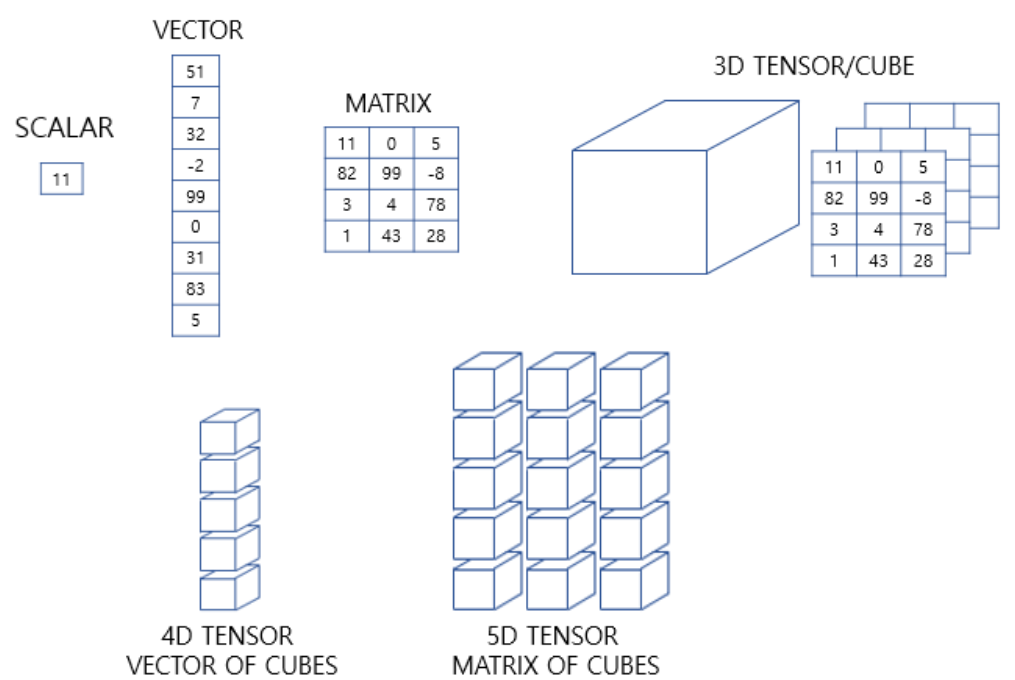

##### **6) PyTorch에서의 텐서**

### **3. 벡터와 행렬의 연산**

In [32]:
import numpy as np

#### **1) 벡터와 행렬의 덧셈과 뺄셈**

In [33]:
A=np.array([8, 4, 5])
B=np.array([1, 2, 3])
print('두 벡터의 합:', A+B)
print('두 벡터의 차:', A-B)

두 벡터의 합: [9 6 8]
두 벡터의 차: [7 2 2]


In [34]:
A=np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B=np.array([[5, 6, 7, 8], [1, 2, 3, 4]])
print('두 행렬의 합:')
print(A+B)
print('두 행렬의 차:')
print(A-B)

두 행렬의 합:
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차:
[[ 5 14 23 32]
 [49 58 67 76]]


##### **2) 벡터의 내적과 행렬의 곱셈**

In [35]:
A=np.array([1, 2, 3])
B=np.array([4, 5, 6])
print('두 벡터의 내적:', np.dot(A, B))

두 벡터의 내적: 32


In [36]:
A=np.array([[1, 3], [2, 4]])
B=np.array([[5, 7], [6, 8]])
print('두 행렬의 행렬곱:')
print(np.matmul(A, B))

두 행렬의 행렬곱:
[[23 31]
 [34 46]]


### **4. 다중 선형 회귀 행렬 연산으로 이해하기**

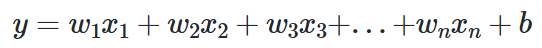

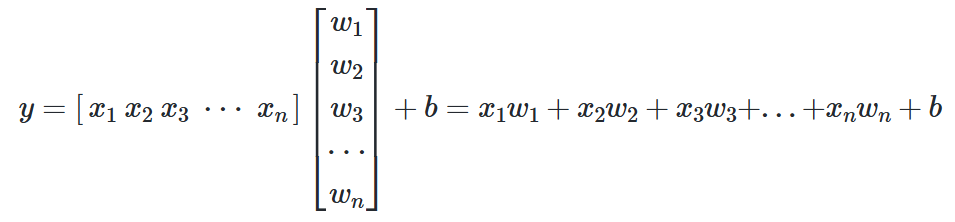

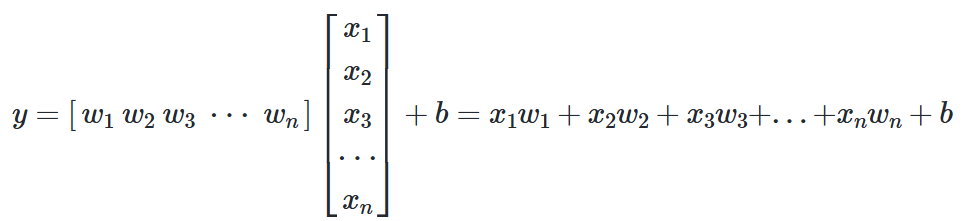

샘플의 개수가 많을 때는 행렬의 곱셈으로 표현할 수 있다.

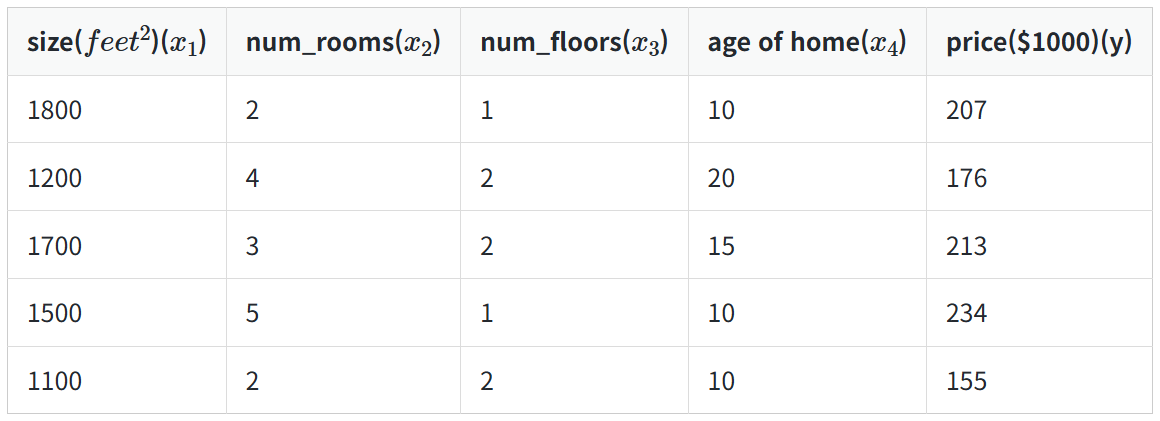

위 데이터에서 입력 행렬 X와 가중치 벡터 W의 곱으로 표현하면 다음과 같다.

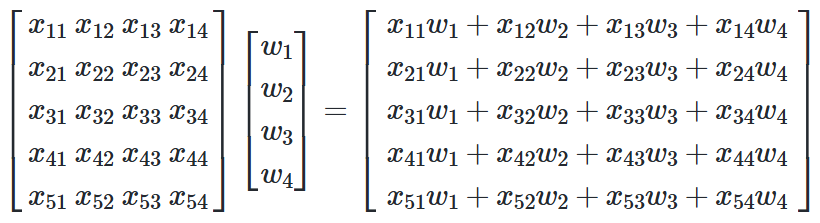

$$H(X)=XW+B$$

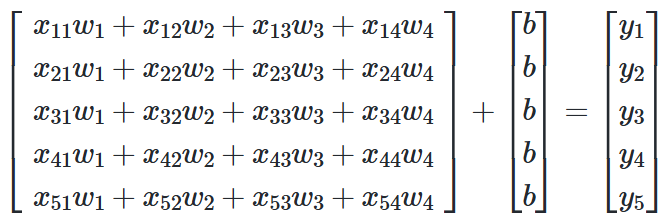

위 수식에서 입력 행렬 X는 5행 4열의 크기를 가진다. 출력 벡터를 Y라고 했을 때 Y는 5행 1열의 크기를 가진다. 여기서 곱셈이 성립하기 위해서 가중치 벡터 W의 크기는 4행 1열을 가져야 함을 추론할 수 있다. 만약 가중치 벡터를 앞에 두고 입력 행렬을 뒤에 두고 행렬 연산을 하면 아래와 같다.
$$H(X)=WX+B$$

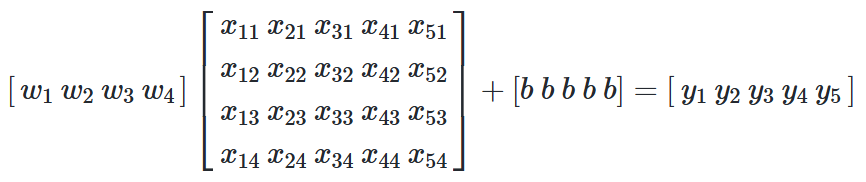

### **5. 샘플, 특성**

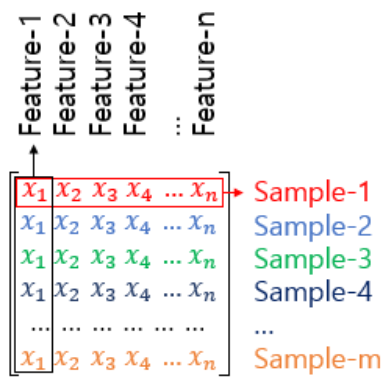

### **6. 가중치와 편향 행렬의 크기 결정**

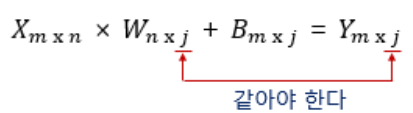